# Demo 3 - Demonstração - Aprendizagem Não Supervisionada - K-Means

### Cybersecurity MBA - Inteligência Artificial e Machine Learning (64SEG)

### Utilização de K-Means para agrupamento de dados de crimes na cidade de Toronto, visando mostrar os pontos centrais de ocorrências do crime do tip b&e (Agrupamento - Aprendizagem Não Supervisionada).

#### Criaremos um mapa de crime do tipo "Break and Enter", classificado na base como um dos Principais Indicadores de Crime (MCI), especificamente em apartamentos no centro de Toronto.  Usando uma técnica de agrupamento com K-Means, o foco principal desta demo exibir os centróides dos clusters, ao invés de examinar os próprios clusters.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
# Upload de nosso arquivo. Ref. - https://data.torontopolice.on.ca/search?tags=MCI

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving MCI_2014_to_2017.csv to MCI_2014_to_2017.csv
User uploaded file "MCI_2014_to_2017.csv" with length 34145138 bytes


In [ ]:
crime_data = pd.read_csv('MCI_2014_to_2017.csv', delimiter=",", header=0)

### Data Wrangling

In [ ]:
crime_data.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,FID
0,-79.520401,43.768829,14601,GO-20142775022,2014-08-25T04:00:00.000Z,2014-08-25T04:00:00.000Z,Outside,1430,100,Assault,...,237.0,Monday,18,Assault,D31,24,Black Creek (24),43.768829,-79.520401,14001
1,-79.580856,43.642574,14602,GO-20142870874,2014-08-25T04:00:00.000Z,2014-09-08T04:00:00.000Z,House,2120,220,B&E W'Intent,...,237.0,Monday,9,Break and Enter,D22,11,Eringate-Centennial-West Deane (11),43.642574,-79.580856,14002
2,-79.260445,43.762909,14603,GO-20142802386,2014-08-25T04:00:00.000Z,2014-08-29T04:00:00.000Z,House,1430,100,Assault,...,237.0,Monday,11,Assault,D41,127,Bendale (127),43.762909,-79.260445,14003
3,-79.367546,43.663208,14604,GO-20142777955,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,Commercial,2120,200,B&E,...,237.0,Monday,17,Break and Enter,D51,71,Cabbagetown-South St.James Town (71),43.663208,-79.367546,14004
4,-79.231758,43.776440,14605,GO-20142778699,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,Other,2120,200,B&E,...,237.0,Monday,16,Break and Enter,D43,137,Woburn (137),43.776440,-79.231758,14005


In [ ]:
crime_data.dtypes

X                      float64
Y                      float64
Index_                   int64
event_unique_id         object
occurrencedate          object
reporteddate            object
premisetype             object
ucr_code                 int64
ucr_ext                  int64
offence                 object
reportedyear             int64
reportedmonth           object
reportedday              int64
reporteddayofyear        int64
reporteddayofweek       object
reportedhour             int64
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour           int64
MCI                     object
Division                object
Hood_ID                  int64
Neighbourhood           object
Lat                    float64
Long                   float64
FID                      int64
dtype: object

In [ ]:
crime_data[crime_data.X != crime_data.Long].head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,FID
2,-79.260445,43.762909,14603,GO-20142802386,2014-08-25T04:00:00.000Z,2014-08-29T04:00:00.000Z,House,1430,100,Assault,...,237.0,Monday,11,Assault,D41,127,Bendale (127),43.762909,-79.260445,14003
3,-79.367546,43.663208,14604,GO-20142777955,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,Commercial,2120,200,B&E,...,237.0,Monday,17,Break and Enter,D51,71,Cabbagetown-South St.James Town (71),43.663208,-79.367546,14004
7,-79.382530,43.705540,14608,GO-20142779486,2014-08-25T04:00:00.000Z,2014-08-26T04:00:00.000Z,House,2120,200,B&E,...,237.0,Monday,21,Break and Enter,D53,99,Mount Pleasant East (99),43.705540,-79.382530,14008
9,-79.344650,43.764641,14610,GO-20142910587,2014-09-14T04:00:00.000Z,2014-09-14T04:00:00.000Z,Apartment,1430,100,Assault,...,257.0,Sunday,20,Assault,D33,45,Parkwoods-Donalda (45),43.764641,-79.344650,14010
15,-79.343803,43.685032,14616,GO-20142906993,2014-09-14T04:00:00.000Z,2014-09-14T04:00:00.000Z,House,2120,200,B&E,...,257.0,Sunday,8,Break and Enter,D54,59,Danforth East York (59),43.685032,-79.343803,14016


In [ ]:
print(crime_data.X[2])
print(crime_data.Long[2])

-79.26044460000001
-79.2604446


In [ ]:
crime_data.drop(['X', 'Y', 'Index_', 'event_unique_id','ucr_code','ucr_ext','FID', 
                 'Neighbourhood'], axis=1, inplace=True)

In [ ]:
occurrencedate_list = crime_data.occurrencedate.str.split('T').tolist()
reporteddate_list = crime_data.reporteddate.str.split('T').tolist()

for i in range(len(occurrencedate_list)):
    occurrencedate_list[i] = occurrencedate_list[i][0]

for i in range(len(reporteddate_list)):
    reporteddate_list[i] = reporteddate_list[i][0]
    
crime_data['occurrencedate'] = occurrencedate_list
crime_data['reporteddate'] = reporteddate_list

crime_data.occurrencedate = pd.to_datetime(crime_data.occurrencedate)
crime_data.reporteddate = pd.to_datetime(crime_data.reporteddate)

In [ ]:
crime_data.drop(['reportedyear', 'reportedmonth', 'reportedday', 'reporteddayofyear', 
                'occurrenceyear', 'occurrencemonth', 'occurrenceday', 'occurrencedayofyear'],
                axis=1, inplace=True)

In [ ]:
crime_data.premisetype = crime_data.premisetype.astype('category', errors='raise')
crime_data.offence = crime_data.offence.astype('category', errors='raise')
crime_data.MCI = crime_data.MCI.astype('category', errors='raise')
crime_data.reporteddayofweek = crime_data.reporteddayofweek.astype('category', errors='raise')
# there are whitespaces in the days of week, which should be removed before transformation
crime_data.occurrencedayofweek = crime_data.occurrencedayofweek.str.rstrip().astype('category', errors='raise')
crime_data.Division = crime_data.Division.astype('category', errors='raise')

### K-Means Clustering

In [ ]:
def doKMeans(data, n_clusters):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(data.Long, data.Lat, marker='.', c='blue', alpha=0.2)
    
    data = data.loc[:, ['Long', 'Lat']]
    
    model = KMeans(n_clusters=n_clusters)
    model.fit(data)
    
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.8, linewidths=3, s=169)
    plt.show()

In [ ]:
break_enter_ap = crime_data[(crime_data.MCI == 'Break and Enter')
                           & (crime_data.premisetype == 'Apartment')]
break_enter_ap.reset_index(inplace=True, drop=True)

Resultado com 3 clusters:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-79.39405628  43.67155631]
 [-79.2815728   43.74187513]
 [-79.50608718  43.70331137]]


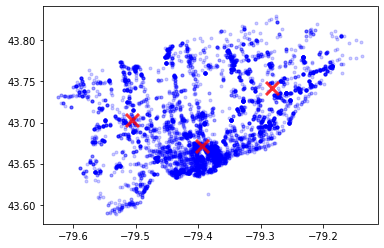

In [ ]:
doKMeans(break_enter_ap, 3)

In [ ]:
break_enter_ap[(break_enter_ap.Long > -79.4) & (break_enter_ap.Lat < 43.63)]
break_enter_ap.drop(71, axis=0, inplace=True)

<ipython-input-15-d8e019336d87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  break_enter_ap.drop(71, axis=0, inplace=True)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-79.37393286  43.66167602]
 [-79.39746564  43.64845085]
 [-79.42072243  43.64769858]]


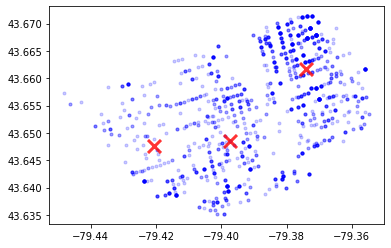

In [ ]:
doKMeans(break_enter_ap[(break_enter_ap.Hood_ID > 70) & (break_enter_ap.Hood_ID < 85)], 3)